# Mahan Madani
## Artificial Neural Networks 1st Project

### Basics: Import libraries and enable cuda

In [1]:
import torch
import torchvision as tv
import torch.nn as nn
import torch.utils.data as data

import matplotlib.pyplot as plt
import numpy as np

from time import time

In [2]:
if torch.cuda.is_available():
    torch.cuda.set_device(0)
    device = torch.device("cuda")
    
    torch.backends.cuda.matmul.allow_tf32 = True
    torch.backends.cudnn.allow_tf32 = True
    torch.backends.cudnn.benchmark = True
else:
    device = torch.device("cpu")

### Download and load FashionMNIST Dataset:

In [3]:
transform = tv.transforms.Compose([tv.transforms.ToTensor(), tv.transforms.Normalize((0.5, ), (0.5, ))])

train_set = tv.datasets.FashionMNIST("./data", download=True, train=True, transform=transform)
test_set = tv.datasets.FashionMNIST("./data", download=True, train=False, transform=transform) 

In [4]:
train_loader = data.DataLoader(train_set, batch_size=100, shuffle=True)
test_loader = data.DataLoader(test_set, batch_size=100, shuffle=True)

### Test one of the images in our dataset

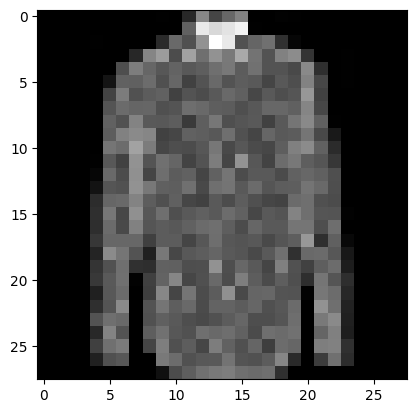

In [5]:
images = iter(test_loader)
input, target = next(images)
plt.imshow(input[0][0], cmap='gray')
plt.show()

## Define functions to test and train model

In [6]:
criterion = nn.CrossEntropyLoss()

In [7]:
def test_model(model, print_accuracy):
    with torch.no_grad():
        test_loss = 0
        accuracy = 0
        
        model.eval()

        for input, target in test_loader:
            input = input.to(device)
            target = target.to(device)

            output = model.forward(input)
            loss = criterion(output, target)
            test_loss += loss.item()

            ps = torch.exp(output)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == target.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor))

    
    test_loss = test_loss/len(test_loader)
    model.test_loss_list.append(test_loss)
    test_accuracy = accuracy / len(test_loader)
    
    if (print_accuracy):
        print(f"test loss: {test_loss},  test accuracy: {test_accuracy}")

In [8]:
def train_model(model, epochs, learning_rate):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.003)
    
    for i in range(epochs):
        current_loss = 0
        model.train()

        for input, target in train_loader:
            optimizer.zero_grad()
            input = input.to(device)
            target = target.to(device)

            #forward-pass
            output = model.forward(input)
            loss = criterion(output, target)

            #backward-pass
            loss.backward()
            optimizer.step()
            current_loss += loss.item()
            

        train_loss = current_loss / len(train_loader)
        model.train_loss_list.append(train_loss)

        # At completion of epoch
        print(f"Epoch: {i+1}/{epochs}, training loss: {train_loss}")
        test_model(model, print_accuracy=False)

In [9]:
def generate_plot(model):
    plt.plot(model.train_loss_list, label = "Training loss")
    plt.plot(model.test_loss_list, label = "Test loss")
    plt.legend(frameon = False)

In [10]:
def run_model(model, epochs, learning_rate):
    start_time = time()
    train_model(model, epochs, learning_rate)
    test_model(model, print_accuracy=True)
    generate_plot(model)
    end_time = time()
    print(f"Total time spent: {end_time - start_time} seconds")


# Question 1: Report the depth effect of hidden layers

## Model 1: Base MLP model (depth = 4)
This model is used for all of the questions (in addition to question 1)

In [11]:
class Model_1(nn.Module):
    def __init__(self):
        super(Model_1, self).__init__()
        self.layer0 = nn.Linear(28*28, 200)  #input layer to hidden layer
        self.layer1 = nn.Linear(200, 100)    #hidden layer to hidden layer
        self.layer2 = nn.Linear(100, 50)     #hidden layer to hidden layer
        self.layer3 = nn.Linear(50, 10)      #output layer to output layer
        
        self.train_loss_list = []
        self.test_loss_list = []
        
    def forward(self, x): 
        x = x.view(x.shape[0], -1) 
        x = torch.relu(self.layer0(x))
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

## Model 2: A different model with fewer hidden layers (depth = 2)

In [12]:
class Model_2(nn.Module):
    def __init__(self):
        super(Model_2, self).__init__()
        self.layer0 = nn.Linear(28*28, 200)  #input layer to hidden layer
        self.layer1 = nn.Linear(200, 10)    #hidden layer to output
        
        self.train_loss_list = []
        self.test_loss_list = []
        
    def forward(self, x): 
        x = x.view(x.shape[0], -1) 
        x = torch.relu(self.layer0(x))
        x = self.layer1(x)
        return x

## Model 3: A different model with more hidden layers (depth = 8)

In [13]:
class Model_3(nn.Module):
    def __init__(self):
        super(Model_3, self).__init__()
        self.layer0 = nn.Linear(28*28, 200)
        self.layer1 = nn.Linear(200, 175)
        self.layer2 = nn.Linear(175, 150)
        self.layer3 = nn.Linear(150, 125)
        self.layer4 = nn.Linear(125, 100)
        self.layer5 = nn.Linear(100, 75)
        self.layer6 = nn.Linear(75, 50)
        self.layer7 = nn.Linear(50, 25)
        self.layer8 = nn.Linear(25, 10)
        
        self.train_loss_list = []
        self.test_loss_list = []
        
    def forward(self, x): 
        x = x.view(x.shape[0], -1) 
        x = torch.relu(self.layer0(x))
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.relu(self.layer4(x))
        x = torch.relu(self.layer5(x))
        x = torch.relu(self.layer6(x))
        x = torch.relu(self.layer7(x))
        x = self.layer8(x)
        return x

## Run all three models and compare

Epoch: 1/20, training loss: 0.5244945099453131
Epoch: 2/20, training loss: 0.38150212573508424
Epoch: 3/20, training loss: 0.34765144671003023
Epoch: 4/20, training loss: 0.3260685181866089
Epoch: 5/20, training loss: 0.3094775857155522
Epoch: 6/20, training loss: 0.29378592905898887
Epoch: 7/20, training loss: 0.28524388529360295
Epoch: 8/20, training loss: 0.27319235193232694
Epoch: 9/20, training loss: 0.26104070140669744
Epoch: 10/20, training loss: 0.2541144647697608
Epoch: 11/20, training loss: 0.24491428156693776
Epoch: 12/20, training loss: 0.24007375032951433
Epoch: 13/20, training loss: 0.23497453791399797
Epoch: 14/20, training loss: 0.22471685440589984
Epoch: 15/20, training loss: 0.22606583319604398
Epoch: 16/20, training loss: 0.21338606733207902
Epoch: 17/20, training loss: 0.21102804065992434
Epoch: 18/20, training loss: 0.2061068321764469
Epoch: 19/20, training loss: 0.2050720591718952
Epoch: 20/20, training loss: 0.1976303410778443
test loss: 0.361695062071085,  test 

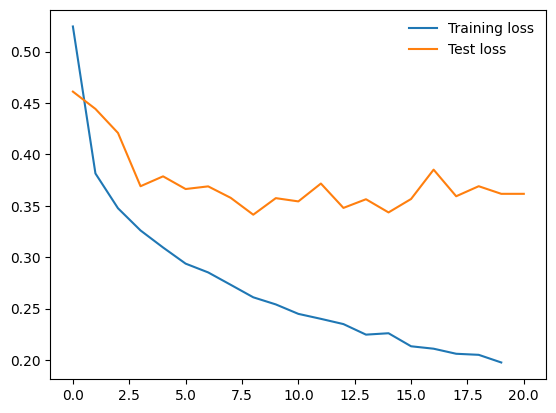

In [14]:
model_1 = Model_1().to(device)
run_model(model_1, epochs=20, learning_rate=0.003)

Epoch: 1/20, training loss: 0.4835103974243005
Epoch: 2/20, training loss: 0.37929910821219287
Epoch: 3/20, training loss: 0.34844594068825246
Epoch: 4/20, training loss: 0.31944934124747915
Epoch: 5/20, training loss: 0.306207526139915
Epoch: 6/20, training loss: 0.2890301591902971
Epoch: 7/20, training loss: 0.2792781582723061
Epoch: 8/20, training loss: 0.27456084781636797
Epoch: 9/20, training loss: 0.26382485379775367
Epoch: 10/20, training loss: 0.2547669991850853
Epoch: 11/20, training loss: 0.25143731317172446
Epoch: 12/20, training loss: 0.24060369037091733
Epoch: 13/20, training loss: 0.2367711311702927
Epoch: 14/20, training loss: 0.22954890495787064
Epoch: 15/20, training loss: 0.2247073183208704
Epoch: 16/20, training loss: 0.21739252959688504
Epoch: 17/20, training loss: 0.2101340034417808
Epoch: 18/20, training loss: 0.20887499012053012
Epoch: 19/20, training loss: 0.20948823742568493
Epoch: 20/20, training loss: 0.20143913492560386
test loss: 0.4150388669967651,  test a

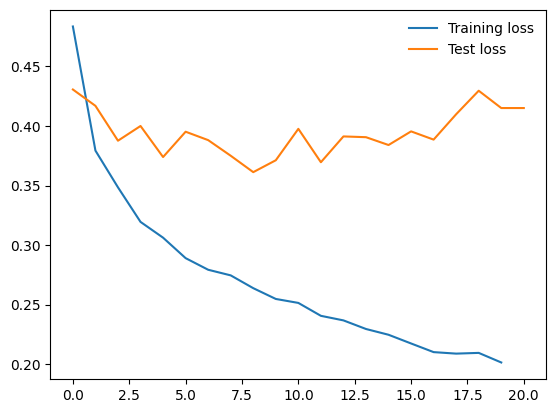

In [15]:
model_2 = Model_2().to(device)
run_model(model_2, epochs=20, learning_rate=0.003)

Epoch: 1/20, training loss: 0.6852993851155043
Epoch: 2/20, training loss: 0.44485911587874094
Epoch: 3/20, training loss: 0.4019359338283539
Epoch: 4/20, training loss: 0.3887148757527272
Epoch: 5/20, training loss: 0.3553127176562945
Epoch: 6/20, training loss: 0.3355373838668068
Epoch: 7/20, training loss: 0.32827781796455385
Epoch: 8/20, training loss: 0.3126761573553085
Epoch: 9/20, training loss: 0.30513624727725985
Epoch: 10/20, training loss: 0.29757622002313533
Epoch: 11/20, training loss: 0.2878627753878633
Epoch: 12/20, training loss: 0.29020157960553966
Epoch: 13/20, training loss: 0.27795580665270486
Epoch: 14/20, training loss: 0.26916215299318236
Epoch: 15/20, training loss: 0.26415968413154284
Epoch: 16/20, training loss: 0.25214268382638694
Epoch: 17/20, training loss: 0.24729251734291513
Epoch: 18/20, training loss: 0.24532680162539086
Epoch: 19/20, training loss: 0.24406476747244596
Epoch: 20/20, training loss: 0.2388423225780328
test loss: 0.40604702949523924,  test

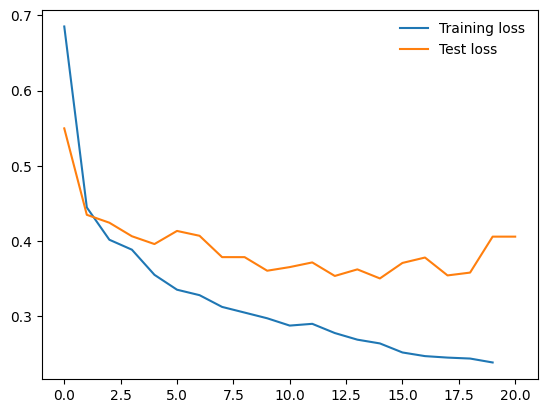

In [16]:
model_3 = Model_3().to(device)
run_model(model_3, epochs=20, learning_rate=0.003)

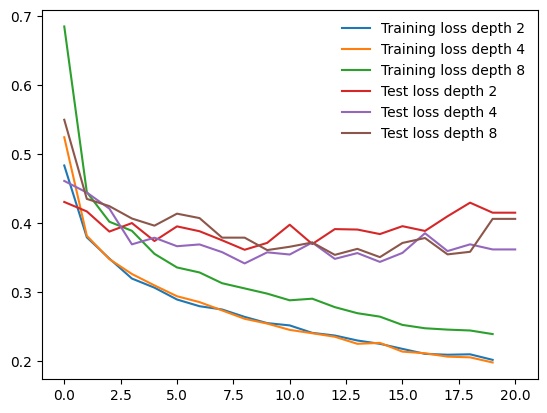

In [17]:
plt.plot(model_2.train_loss_list, label = "Training loss depth 2")
plt.plot(model_1.train_loss_list, label = "Training loss depth 4")
plt.plot(model_3.train_loss_list, label = "Training loss depth 8")

plt.plot(model_2.test_loss_list, label = "Test loss depth 2")
plt.plot(model_1.test_loss_list, label = "Test loss depth 4")
plt.plot(model_3.test_loss_list, label = "Test loss depth 8")

plt.legend(frameon = False)

## Analysis Result: 

#### Observations:
- Model_3 with 8 hiddem layers has the highest training loss
- All 3 models have very similar test loss values but Model_2 with 2 hidden layers has the highest test loss
- Model_1 (4 layers) and Model_2 (2 layers) have an almsot identical graph for training loss

Conclusion: Having just 2 hidden layers doesn't seem enough for this dataset as it causes overfiting much faster than the other models. Having 8 layers results in higher training loss values. Ultimately, this Neural Network seems to work best with 4 layers.




# Analyze the dropout technique

In [18]:
class DropoutModel(nn.Module):
    def __init__(self):
        super(DropoutModel, self).__init__()
        self.layer0 = nn.Linear(28*28, 200)
        self.layer1 = nn.Linear(200, 100)
        self.layer2 = nn.Linear(100, 50)
        self.layer3 = nn.Linear(50, 10)
        
        self.dropout = nn.Dropout(0.25)
        
        self.train_loss_list = []
        self.test_loss_list = []
        
    def forward(self, x): 
        x = x.view(x.shape[0], -1) 
        
        x = torch.relu(self.layer0(x))
        x = self.dropout(x)
        
        x = torch.relu(self.layer1(x))
        x = self.dropout(x)
        
        x = torch.relu(self.layer2(x))
        x = self.dropout(x)
        
        x = self.layer3(x)
        return x

Epoch: 1/20, training loss: 0.6501870646079382
Epoch: 2/20, training loss: 0.4982919755081336
Epoch: 3/20, training loss: 0.4617751797537009
Epoch: 4/20, training loss: 0.4422941923638185
Epoch: 5/20, training loss: 0.4289212270329396
Epoch: 6/20, training loss: 0.4189945284773906
Epoch: 7/20, training loss: 0.4110263639688492
Epoch: 8/20, training loss: 0.4003940190374851
Epoch: 9/20, training loss: 0.3989758777866761
Epoch: 10/20, training loss: 0.3940066991498073
Epoch: 11/20, training loss: 0.3857965180526177
Epoch: 12/20, training loss: 0.3854708997408549
Epoch: 13/20, training loss: 0.3759824710090955
Epoch: 14/20, training loss: 0.3764410402625799
Epoch: 15/20, training loss: 0.3703362593303124
Epoch: 16/20, training loss: 0.3634889959295591
Epoch: 17/20, training loss: 0.3657461893806855
Epoch: 18/20, training loss: 0.3652746104449034
Epoch: 19/20, training loss: 0.3564712060491244
Epoch: 20/20, training loss: 0.3568045071015755
test loss: 0.37294123098254206,  test accuracy: 0

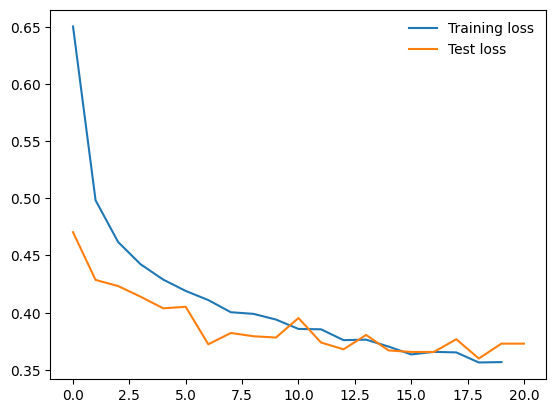

In [19]:
dropout_model = DropoutModel().to(device)
run_model(dropout_model, epochs=20, learning_rate=0.003)

## Analysis
Comparing the results of the dropout model to Model_1 from the previous question, we can see that the dropout technique has lowered the test loss values and eliminated some of the overfitting seen in the base version, at the cost of overall higher values for training loss

# Use early stopping criteria

In [20]:
class EarlyStopper:
    def __init__(self, patience, min_delta):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_test_loss = np.inf

    def early_stop(self, test_loss):
        if test_loss < self.min_test_loss:
            self.min_test_loss = test_loss
            self.counter = 0
        elif test_loss > (self.min_test_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                print(f"Current test loss: {test_loss},  minimum test loss: {self.min_test_loss}")
                return True
        return False

In [21]:
def early_stop_train_model(model, epochs, learning_rate):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.003)
    early_stopper = EarlyStopper(2, 0.05)
    
    for i in range(epochs):
        current_loss = 0
        model.train()

        for input, target in train_loader:
            optimizer.zero_grad()
            input = input.to(device)
            target = target.to(device)

            #forward-pass
            output = model.forward(input)
            loss = criterion(output, target)

            #backward-pass
            loss.backward()
            optimizer.step()
            current_loss += loss.item()
            

        train_loss = current_loss / len(train_loader)
        model.train_loss_list.append(current_loss/len(train_loader))

        # At completion of epoch
        print(f"Epoch: {i+1}/{epochs}, training loss: {train_loss}")
        test_model(model, print_accuracy=False)
        
        if early_stopper.early_stop(model.test_loss_list[-1]):
            print("EARLY STOP")
            break

Epoch: 1/40, training loss: 0.5110239316523075
Epoch: 2/40, training loss: 0.3862750218063593
Epoch: 3/40, training loss: 0.34724630701045195
Epoch: 4/40, training loss: 0.3267541517689824
Epoch: 5/40, training loss: 0.3094943412890037
Epoch: 6/40, training loss: 0.2957824524988731
Epoch: 7/40, training loss: 0.28809826236218217
Epoch: 8/40, training loss: 0.272484176295499
Epoch: 9/40, training loss: 0.26412357653180757
Epoch: 10/40, training loss: 0.2539708904797832
Epoch: 11/40, training loss: 0.2505410128335158
Epoch: 12/40, training loss: 0.23971361571302016
Epoch: 13/40, training loss: 0.23458822209388017
Epoch: 14/40, training loss: 0.2305883692515393
Epoch: 15/40, training loss: 0.22296067173282305
Epoch: 16/40, training loss: 0.21908222978313763
Epoch: 17/40, training loss: 0.21073423173278572
Epoch: 18/40, training loss: 0.20724955450743437
Epoch: 19/40, training loss: 0.20459615701188644
Epoch: 20/40, training loss: 0.19609098511437575
Epoch: 21/40, training loss: 0.19732612

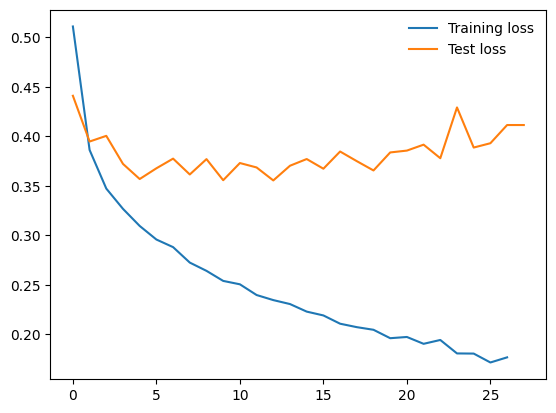

In [22]:
early_stop_model = Model_1().to(device)
early_stop_train_model(early_stop_model, epochs=40, learning_rate=0.003)
test_model(early_stop_model, print_accuracy=True)
generate_plot(early_stop_model)

## Result
Using this method helps us avoid overfitting by stopping the training process before it memorizes too much of the data. Once the test loss value starts to get bigger than its value from the previous epoc, the training process is stopped.

# Batch Normalization

In [52]:
class BatchModel(nn.Module):
    def __init__(self):
        super(BatchModel, self).__init__()
        self.layer0 = nn.Linear(28*28, 200)
        self.layer1 = nn.Linear(200, 100)
        self.layer2 = nn.Linear(100, 50)
        self.layer3 = nn.Linear(50, 10)
        
        self.batch_layer0 = nn.BatchNorm1d(200)
        self.batch_layer1 = nn.BatchNorm1d(100)
        self.batch_layer2 = nn.BatchNorm1d(50)
        
        
        self.train_loss_list = []
        self.test_loss_list = []
        
    def forward(self, x): 
        x = x.view(x.shape[0], -1) 
        
        x = torch.relu(self.layer0(x))
        x = self.batch_layer0(x)
        
        x = torch.relu(self.layer1(x))
        x = self.batch_layer1(x)
        
        x = torch.relu(self.layer2(x))
        x = self.batch_layer2(x)
        
        x = self.layer3(x)
        return x

Epoch: 1/20, training loss: 0.48175842138628167
Epoch: 2/20, training loss: 0.37736688636243343
Epoch: 3/20, training loss: 0.34515568683544795
Epoch: 4/20, training loss: 0.32471658339103066
Epoch: 5/20, training loss: 0.30699081140259904
Epoch: 6/20, training loss: 0.293313367664814
Epoch: 7/20, training loss: 0.28534772178779044
Epoch: 8/20, training loss: 0.27246718022972344
Epoch: 9/20, training loss: 0.26288939983894427
Epoch: 10/20, training loss: 0.25166986500223476
Epoch: 11/20, training loss: 0.2423995928838849
Epoch: 12/20, training loss: 0.2383344434822599
Epoch: 13/20, training loss: 0.2310883954167366
Epoch: 14/20, training loss: 0.2239514856909712
Epoch: 15/20, training loss: 0.21853201686094204
Epoch: 16/20, training loss: 0.2116927860242625
Epoch: 17/20, training loss: 0.20529136925935745
Epoch: 18/20, training loss: 0.20183926329016685
Epoch: 19/20, training loss: 0.1945862066745758
Epoch: 20/20, training loss: 0.19198583024243512
test loss: 0.4266796973347664,  test 

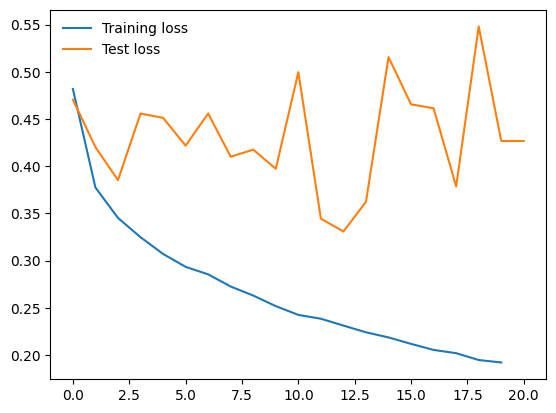

In [53]:
batch_model = BatchModel().to(device)
run_model(batch_model, epochs=20, learning_rate=0.003)

Batch Normalization is defined as the process of training the neural network while normalizing the input to the layer for each of the small batches.
This process stabilizes the learning process and also reduces the number of epochs required to train the model.

# L1 and L2 Regularization

### L1 regularization (loss function + multiplier * |w|)

In [23]:
def L1_train_model(model, epochs, learning_rate):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.003)
    
    for i in range(epochs):
        current_loss = 0
        model.train()

        for input, target in train_loader:
            optimizer.zero_grad()
            input = input.to(device)
            target = target.to(device)

            #forward-pass
            output = model.forward(input)
            loss = criterion(output, target)
            
            #L1 regularization
            for w in model.named_parameters():
                L1_reg = torch.sum(w[1].__abs__())
            
            multiplier = 0.0001
            loss += multiplier * L1_reg

            #backward-pass
            loss.backward()
            optimizer.step()
            current_loss += loss.item()
            

        train_loss = current_loss / len(train_loader)
        model.train_loss_list.append(current_loss/len(train_loader))

        # At completion of epoch
        print(f"Epoch: {i+1}/{epochs}, training loss: {train_loss}")
        test_model(model, print_accuracy=False)

Epoch: 1/20, training loss: 0.5201795358210802
Epoch: 2/20, training loss: 0.3888998751093944
Epoch: 3/20, training loss: 0.35060376410683
Epoch: 4/20, training loss: 0.3300195288658142
Epoch: 5/20, training loss: 0.3107888695970178
Epoch: 6/20, training loss: 0.29695994132508835
Epoch: 7/20, training loss: 0.2859776972855131
Epoch: 8/20, training loss: 0.27532957497984173
Epoch: 9/20, training loss: 0.2662682968005538
Epoch: 10/20, training loss: 0.25773890619476636
Epoch: 11/20, training loss: 0.24871670118222633
Epoch: 12/20, training loss: 0.24493560971071324
Epoch: 13/20, training loss: 0.23376962535083293
Epoch: 14/20, training loss: 0.23011632824937503
Epoch: 15/20, training loss: 0.22576567692061264
Epoch: 16/20, training loss: 0.21936078964422145
Epoch: 17/20, training loss: 0.21109603038678568
Epoch: 18/20, training loss: 0.20953260660171508
Epoch: 19/20, training loss: 0.2030267972374956
Epoch: 20/20, training loss: 0.20121079557264845
test loss: 0.3870171931385994,  test ac

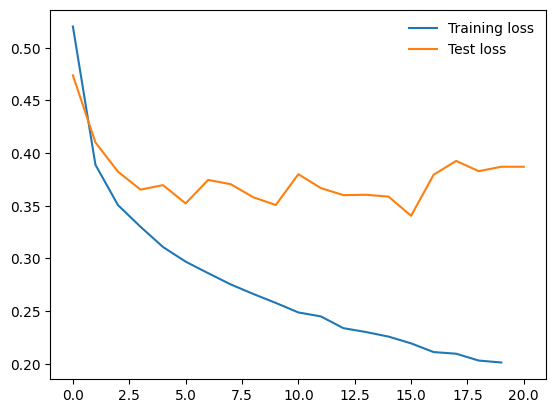

In [24]:
L1_model = Model_1().to(device)
L1_train_model(L1_model, epochs=20, learning_rate=0.003)
test_model(L1_model, print_accuracy=True)
generate_plot(L1_model)

### L2 regularization (loss function + multiplier * ||w||)

In [25]:
def L2_train_model(model, epochs, learning_rate):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.003)
    
    for i in range(epochs):
        current_loss = 0
        model.train()

        for input, target in train_loader:
            optimizer.zero_grad()
            input = input.to(device)
            target = target.to(device)

            #forward-pass
            output = model.forward(input)
            loss = criterion(output, target)
            
            #L2 regularization
            for w in model.named_parameters():
                L2_reg = torch.sum(w[1].norm(2) ** 2)
            
            multiplier = 0.0001
            loss += multiplier * L2_reg

            #backward-pass
            loss.backward()
            optimizer.step()
            current_loss += loss.item()


        train_loss = current_loss / len(train_loader)
        model.train_loss_list.append(current_loss/len(train_loader))

        # At completion of epoch
        print(f"Epoch: {i+1}/{epochs}, training loss: {train_loss}")
        test_model(model, print_accuracy=False)

Epoch: 1/20, training loss: 0.5222279749562343
Epoch: 2/20, training loss: 0.3809985548009475
Epoch: 3/20, training loss: 0.3449125086267789
Epoch: 4/20, training loss: 0.3234290014455716
Epoch: 5/20, training loss: 0.3123492664347092
Epoch: 6/20, training loss: 0.29258148906131587
Epoch: 7/20, training loss: 0.28264971329520144
Epoch: 8/20, training loss: 0.27403554586072765
Epoch: 9/20, training loss: 0.267295125151674
Epoch: 10/20, training loss: 0.259094076367716
Epoch: 11/20, training loss: 0.2505542242775361
Epoch: 12/20, training loss: 0.24186461395273606
Epoch: 13/20, training loss: 0.23629762499282758
Epoch: 14/20, training loss: 0.23345126473655303
Epoch: 15/20, training loss: 0.2222714094693462
Epoch: 16/20, training loss: 0.22103546772152186
Epoch: 17/20, training loss: 0.21448997252310315
Epoch: 18/20, training loss: 0.20937568473940094
Epoch: 19/20, training loss: 0.20526151202619075
Epoch: 20/20, training loss: 0.19500985040018956
test loss: 0.37816195785999296,  test ac

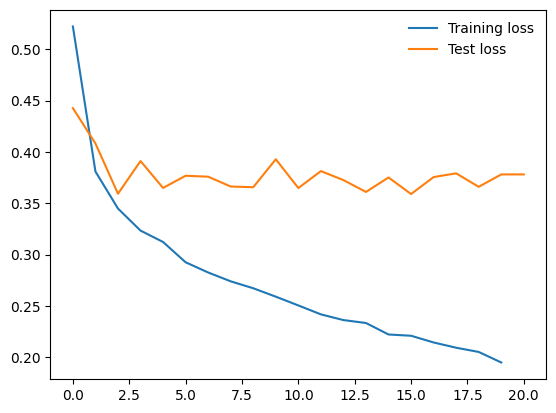

In [26]:
L2_model = Model_1().to(device)
L2_train_model(L2_model, epochs=20, learning_rate=0.003)
test_model(L2_model, print_accuracy=True)
generate_plot(L2_model)